In [79]:
import h5py
import numpy as np
import pickle
import glob
from scipy.stats import spearmanr
import math
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

magic_thrh = 0.048

if_bg = True
category = 'car'
file_path = '/mnt/4T-HD/qing/intermediate/feat/'
# objects = ['car', 'aeroplane', 'bicycle', 'bus', 'motorbike', 'train']
filename = file_path + '{0}_mergelist_rand_train.pickle'.format(category)
if if_bg:
    filename = file_path + '{0}_mergelist_rand_train_bg.pickle'.format(category)
        
print(filename)
with open(filename, 'rb') as fh:
    _, _, r_super_set = pickle.load(fh)

N = len(r_super_set)
layer_feature_b = [None for nn in range(N)]
stride=1
for nn in range(N):
    # layer_feature_b[nn] = (layer_feature_dist[nn]<magic_thh).astype(int)
    ihh, iww, idd = r_super_set[nn].shape
    
    tmp = np.zeros((math.ceil(ihh/stride), math.ceil(iww/stride), idd)).astype('int')
    for hh in range(0,ihh,stride):
        for ww in range(0,iww,stride):
            d_min = np.unravel_index(np.argmin(r_super_set[nn][hh:hh+stride,ww:ww+stride,:]), \
                                 r_super_set[nn][hh:hh+stride,ww:ww+stride,:].shape)
            if np.min(r_super_set[nn][hh:hh+stride,ww:ww+stride,:]) < magic_thrh:
                tmp[int(hh/stride),int(ww/stride),d_min[2]] = 1
            
    layer_feature_b[nn] = tmp.T
    

/mnt/4T-HD/qing/intermediate/feat/car_mergelist_rand_train_bg.pickle


In [80]:
'''
N=len(layer_feature_dist_all)
magic_thh = 0.7

layer_feature_b = [None for nn in range(N)]
for nn in range(N):
    layer_feature_b[nn] = (layer_feature_dist_all[nn]<magic_thh).astype(int)
'''    

'\nN=len(layer_feature_dist_all)\nmagic_thh = 0.7\n\nlayer_feature_b = [None for nn in range(N)]\nfor nn in range(N):\n    layer_feature_b[nn] = (layer_feature_dist_all[nn]<magic_thh).astype(int)\n'

In [81]:
# VC num
max_0 = max([layer_feature_b[nn].shape[0] for nn in range(N)])

# width
max_1 = max([layer_feature_b[nn].shape[1] for nn in range(N)])

# height
max_2 = max([layer_feature_b[nn].shape[2] for nn in range(N)])
print(max_0, max_1, max_2)

80 48 9


In [82]:
all_bg_b = np.zeros((max_0, max_1, max_2))
for nn in range(N):
    vnum, ww, hh = layer_feature_b[nn].shape
    assert(vnum == max_0)
    diff_w1 = int((max_1-ww)/2)
    diff_w2 = int(max_1-ww-diff_w1)
    assert(max_1 == diff_w1+diff_w2+ww)
    
    diff_h1 = int((max_2-hh)/2)
    diff_h2 = int(max_2-hh-diff_h1)
    assert(max_2 == diff_h1+diff_h2+hh)
    
    padded = np.pad(layer_feature_b[nn], ((0,0),(diff_w1, diff_w2),(diff_h1, diff_h2)), 'constant', constant_values=0)
    all_bg_b += np.pad(layer_feature_b[nn], ((0,0),(diff_w1, diff_w2),(diff_h1, diff_h2)), 'constant', constant_values=0)
    
probs = all_bg_b/N + 1e-3

In [83]:
np.argsort(np.max(np.max(probs, axis=1),axis=1))

array([17,  8, 34, 73, 58, 75, 71, 39, 60, 42, 51, 33, 48, 44, 35, 26, 65,
        4, 76, 10, 59, 46, 41, 49, 57, 47,  5, 45,  9, 40, 38, 27, 67,  7,
       28, 29, 52, 79, 37, 11, 78,  1, 53,  2, 23, 63, 19,  0, 68, 21, 20,
       13, 77,  6, 36, 55, 50, 69, 25, 18, 15, 24, 74, 31, 66, 72, 61, 56,
       64, 70, 30, 43, 32, 16, 14, 54, 62,  3, 12, 22])

0.121256547301
0.0394412672962
0.001


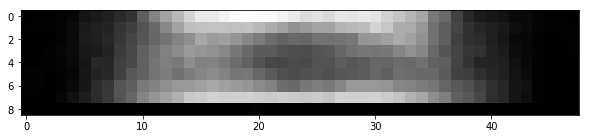

In [86]:
# mean_acr_vc = np.mean(probs, axis=0)
# print(np.max(mean_acr_vc))
# print(np.mean(mean_acr_vc))
# print(np.min(mean_acr_vc))
vcid=3
print(np.max(probs[vcid]))
print(np.mean(probs[vcid]))
print(np.min(probs[vcid]))

fig, ax = plt.subplots()
# ax.imshow(mean_acr_vc.T)
ax.imshow(probs[vcid].T)
plt.show()

In [44]:
weights = np.log(probs/(1.-probs))
print(weights.shape)
save_path = '/mnt/4T-HD/qing/intermediate/unary_weights/'
savefile = save_path+'{0}_train.pickle'.format(category)
if if_bg:
    savefile = save_path+'{0}_train_bg.pickle'.format(category)
    
with open(savefile, 'wb') as fh:
    pickle.dump(weights, fh)

'''
import scipy.io as sio
sio.savemat('/media/zzs/4TB/qingliu/qing_intermediate/unary_weights/all_train_bg2.mat', mdict={'weight': weights})
'''

(80, 25, 14)


"\nimport scipy.io as sio\nsio.savemat('/media/zzs/4TB/qingliu/qing_intermediate/unary_weights/all_train_bg2.mat', mdict={'weight': weights})\n"

In [24]:
!pwd

/home/candy/qing_voting_139/qing_clustering
